# 分类树
DecisionTreeClassifier  

- 重要参数：criterion 
分类树衡量分枝质量的指标，支持的标准有两种：
1）默认值，"gini"基尼指数；  
2）"entropy"信息增益；  

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz

## 数据预处理，了解数据形式

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
# 如果data和target在一张表中
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names  # 特征名称

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names  # 标签名称

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
# 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [9]:
Xtrain.shape

(124, 13)

In [10]:
Xtest.shape

(54, 13)

## 训练模型

In [11]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

## 画出决策树

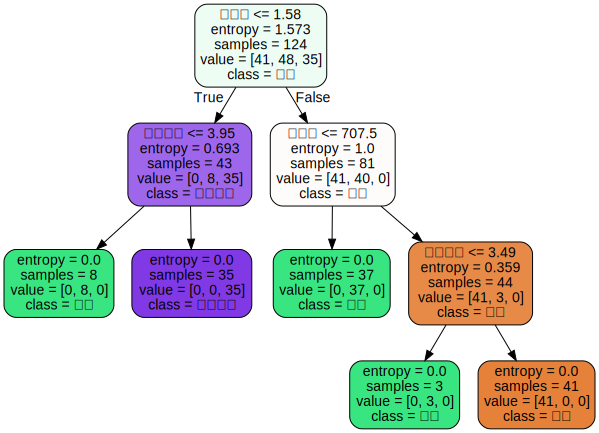

In [12]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                     ,feature_names = feature_name
                     ,class_names=["琴酒","雪莉","贝尔摩德"]
                     ,filled=True  # 颜色
                     ,rounded=True  # 圆棱角
                    )
graph = graphviz.Source(dot_data)
graph

# 分析：颜色越深，不纯度越低

In [13]:
# 展示特征重要性
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.43198537, 0.        , 0.        , 0.23380247,
       0.        , 0.        , 0.33421216])

In [14]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.43198537019438454),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.23380247319548086),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3342121566101346)]

## 剪枝
- max_depth=3  # 最大深度
- min_samples_leaf=5  # 拆分出的节点至少包含的样本数量
- min_samples_split=25  # 至少包含多少个样本可以进行拆分
- max_features  # 限制分枝时考虑的特征个数，超过限制个数的特征都被舍弃
- min_impurity_decrease  # 限制信息增益大小

0.9074074074074074


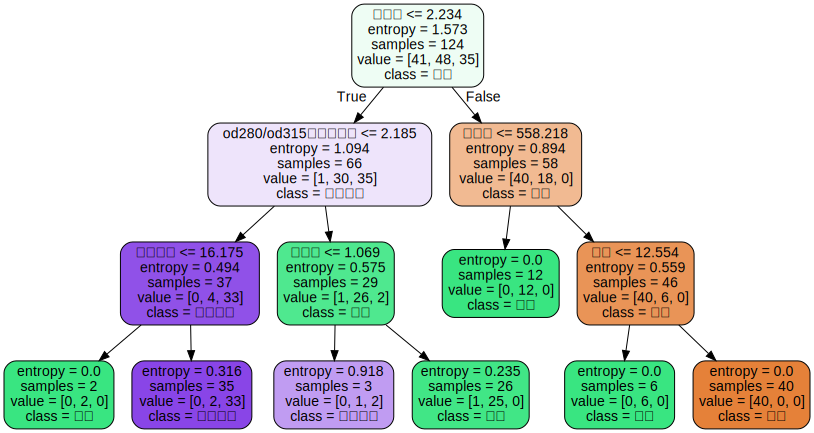

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3  # 最大深度
                                #    ,min_samples_leaf=10
                                #    ,min_samples_split=25
                                    )
clf = clf.fit(Xtrain, Ytrain)
print(clf.score(Xtest, Ytest))
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

## 预测
- apply  # 返回每个测试样本所在的叶子节点的索引
- predict  # 返回每个测试样本的分类/回归结果

In [19]:
clf.apply(Xtest)

array([12,  3,  9, 12,  4, 12, 12, 12,  7,  7, 12, 12,  7,  4,  4,  4,  7,
       12, 12,  4, 12, 12,  3,  4, 12,  4,  7, 12,  4,  9,  4,  4, 12,  4,
        7,  9,  7, 12,  4,  4,  7, 12,  4,  9,  9,  4,  4,  9, 12, 12,  7,
       12, 12,  7])

In [20]:
clf.predict(Xtest)

array([0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 0, 0, 1, 0, 0, 1])

## 附加1：随机性参数
- random_state=30
- splitter="random"

0.9444444444444444


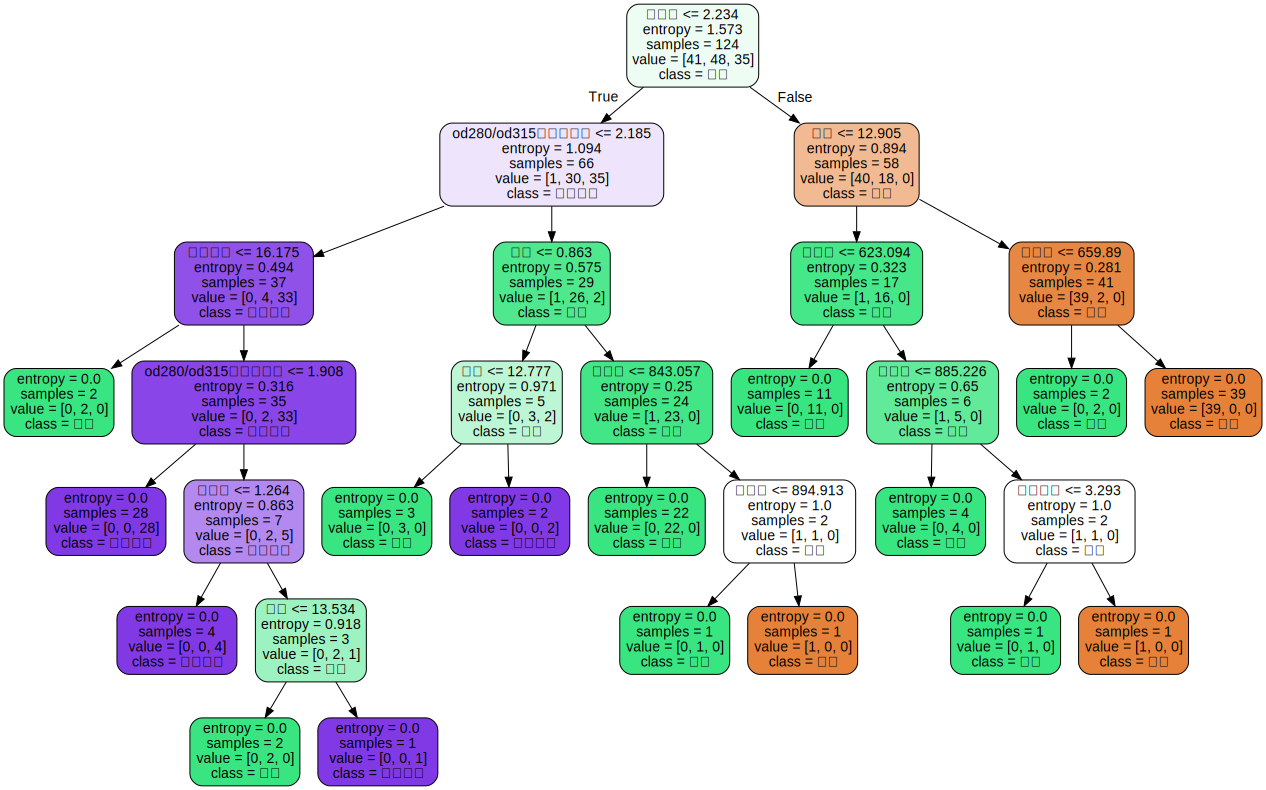

In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
clf = clf.fit(Xtrain, Ytrain)
print(clf.score(Xtest, Ytest))
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

## 附加2：超参数曲线——画图看参数对分数的影响
如，看树深度对结果的影响

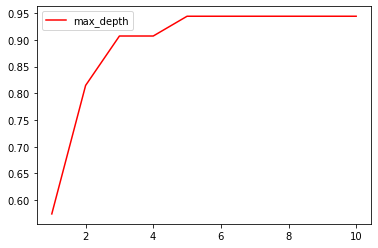

In [22]:

import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

## 附加3：目标权重参数
- class_weight  # 对样本标签进行均衡，给少量标签更多的权重
- min_weight_fraction_leaf  # 如果设置权重了，用min_weight_fraction_leaf进行剪枝

## 小结
__分类树DecisionTreeClassifier,决策树绘图export_graphviz__
- 八个参数：criterion,两个随机性参数(random_state, splitter),五个剪枝参数(max_depth, min_samples_split, min_samples_leaf, max_feature, min_impurity_decrease)
- 一个属性：feature_importances_
- 四个接口：fit, score, apply, predict